In [20]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
# Importamos utilidades y modelos de sklearn
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import pickle

# Se levantan RF_train y RF_test

In [21]:
RF_train = pd.read_csv("RF_train")

In [22]:
RF_test = pd.read_csv("RF_test")

In [23]:
y_train = pd.read_csv("y_train")

In [24]:
y_test = pd.read_csv("y_test")

# Entreno el randomForest con RF_train

In [25]:
model_RF = RandomForestRegressor(n_estimators = 1600, min_samples_split = 12,
 min_samples_leaf = 4,
 max_features = 0.4,
 max_depth = 160,
 bootstrap = True,  n_jobs= -1, random_state = 0)

model_RF.fit(RF_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=160,
           max_features=0.4, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=12,
           min_weight_fraction_leaf=0.0, n_estimators=1600, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

# Testeo el modelo final

## Se hacen las dos predicciones necesarias

In [26]:
pred_train = model_RF.predict(RF_train)
pred_test = model_RF.predict(RF_test)

### Metrica de Mean Absolute Error (La de Kaggle) ?? (Hay que preguntar)

In [27]:
mae_train = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, pred_train))
mae_test = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, pred_test))
#print(f"MAE train: {mea_train:.5f}")
#print(f"MAE test: {mea_test:.5f}")
print("MAE train: "+str(mae_train))
print("MAE test: "+str(mae_test))

MAE train: 475.7957721626074
MAE test: 723.3756645301457


In [28]:
model_RF.feature_importances_

array([0.00179059, 0.00661835, 0.01262226, 0.00198603, 0.00298907,
       0.00587562, 0.0013816 , 0.00427289, 0.002143  , 0.01915451,
       0.01609637, 0.00770151, 0.00187825, 0.01017229, 0.00235148,
       0.00725051, 0.0091097 , 0.00582869, 0.02978223, 0.00087915,
       0.00437831, 0.00719557, 0.0329164 , 0.00415157, 0.00406675,
       0.0068771 , 0.00588933, 0.00413386, 0.00650999, 0.00163265,
       0.00875227, 0.06098135, 0.00205281, 0.0029656 , 0.00801689,
       0.00284397, 0.00357853, 0.00679871, 0.04334189, 0.00569121,
       0.00081486, 0.00351462, 0.00981992, 0.05294458, 0.04557058,
       0.00971864, 0.00127569, 0.00219713, 0.00562094, 0.00332197,
       0.00409857, 0.00422596, 0.04715687, 0.00253313, 0.00236677,
       0.00570536, 0.01252494, 0.01652634, 0.00532748, 0.00748476,
       0.01146925, 0.01226762, 0.00180133, 0.01259765, 0.00409658,
       0.00760814, 0.00185603, 0.0064911 , 0.03028722, 0.01252873,
       0.00423252, 0.00551753, 0.02925951, 0.01890482, 0.01962

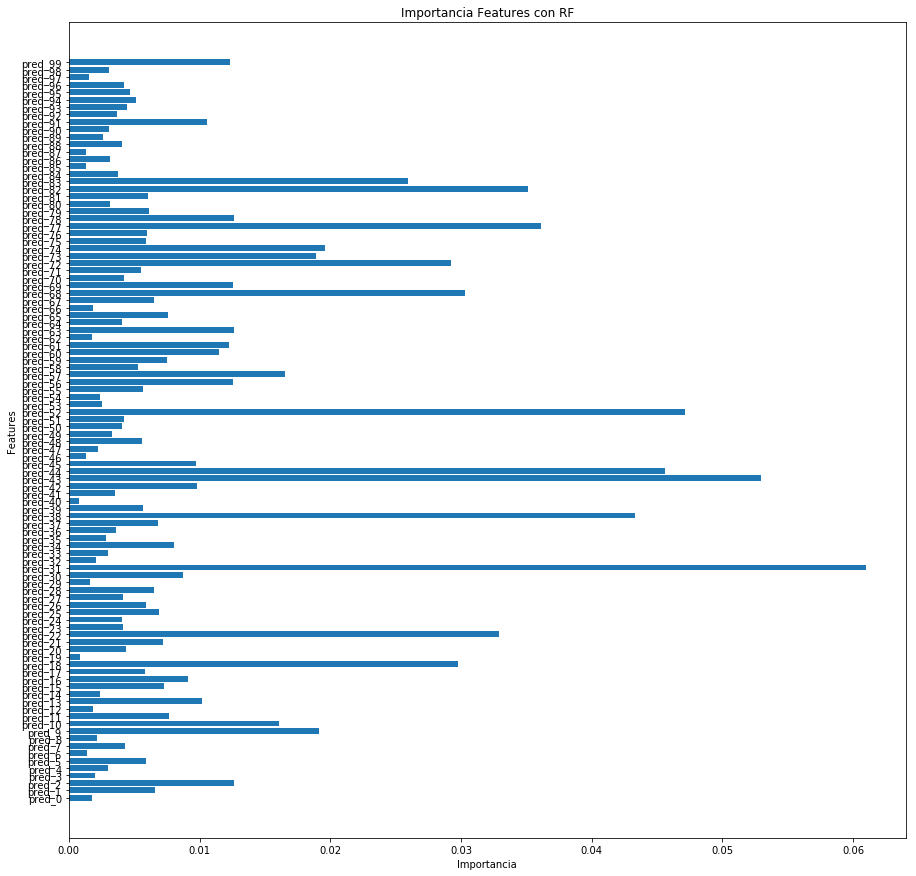

In [29]:
plt.figure(figsize = (15,15))
plt.barh(RF_train.columns, model_RF.feature_importances_)
plt.xlabel('Importancia')
plt.ylabel('Features')
plt.title('Importancia Features con RF')
plt.show()

# Se exporta el modelo

In [30]:
with open("model_RF", 'wb') as write_file:
    pickle.dump(model_RF, write_file)